PLATO HOW#3
--

---

# Physical consistency checks


by [Earl Patrick Bellinger](https://earlbellinger.com)$^{1,2}$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_ \
$^2$_Stellar Astrophysics Centre, Aarhus, Denmark_

In [1]:
import os

import numpy as np
import scipy as sp
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider, FloatSlider

from uncertainties import ufloat

import seaborn as sns

In [2]:
# Set plotting style 
sns.set(style="ticks", palette="muted", 
        rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('src/matplotlibrc')

## Read in MESA models

In [3]:
logs_dir = os.path.join('work', 'LOGS')

In [4]:
def load_history_file(logs_dir=logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'), 
        skiprows=5, sep='\s+')

DF = load_history_file()
DF

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,delta_nu,nu_max,num_retries,num_iters
0,5,810,7.441600e+05,5.316725,1.0,33.298506,-99.0,0.067442,0.064710,7.812969e-08,...,0.002762,0.008767,0.003221,0.008767,0.712294,0.268932,170.949370,4054.896776,0,2
1,10,809,2.595868e+06,5.712631,1.0,33.298506,-99.0,0.062240,0.061934,7.812969e-08,...,0.002650,0.008767,0.003221,0.008767,0.712278,0.268940,172.813158,4116.536991,0,3
2,15,805,7.203511e+06,6.108537,1.0,33.298506,-99.0,0.053297,0.051119,7.812969e-08,...,0.002346,0.008767,0.003221,0.008766,0.712240,0.268964,173.620569,4141.451262,0,5
3,20,799,1.866880e+07,6.504444,1.0,33.298506,-99.0,0.038470,0.038347,7.812969e-08,...,0.001662,0.008768,0.003220,0.008764,0.712149,0.269027,173.909145,4152.404334,0,5
4,25,795,4.719811e+07,6.900350,1.0,33.298506,-99.0,0.019253,1.000000,9.687385e-01,...,0.000590,0.008769,0.003219,0.008760,0.711932,0.269197,172.943230,4116.999191,0,5
5,30,785,1.181882e+08,7.296256,1.0,33.298506,-99.0,0.002742,1.000000,9.692780e-01,...,0.000038,0.008773,0.003215,0.008748,0.711405,0.269649,171.959283,4081.808362,0,10
6,35,787,2.948341e+08,7.692162,1.0,33.298506,-99.0,0.000000,1.000000,9.695613e-01,...,0.000014,0.008782,0.003204,0.008720,0.710118,0.270827,170.565777,4034.058467,0,10
7,40,789,7.343858e+08,8.088069,1.0,33.298506,-99.0,0.000000,1.000000,9.701422e-01,...,0.000014,0.008801,0.003179,0.008651,0.706907,0.273886,167.880836,3942.593974,0,10
8,45,791,1.487662e+09,8.133458,1.0,33.298506,-99.0,0.000000,1.000000,9.713872e-01,...,0.000015,0.008824,0.003136,0.008534,0.701233,0.279412,163.437741,3793.293789,0,10
9,50,790,2.140611e+09,8.109993,1.0,33.298506,-99.0,0.000000,1.000000,9.724800e-01,...,0.000016,0.008830,0.003098,0.008432,0.696101,0.284461,159.484185,3662.362122,0,10


In [5]:
def get_index(logs_dir=logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

index = get_index()

In [6]:
def get_history(profile_number, DF=DF, index=index):
    model_number = index[index.profile_number == profile_number].model_number.values[0]
    return DF[DF.model_number == model_number]

get_history(5)

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,delta_nu,nu_max,num_retries,num_iters
19,100,794,7.618213e+09,7.831747,1.0,33.298506,-99.0,0.0,1.0,0.977056,...,0.000049,0.004274,0.002799,0.007617,0.640838,0.339488,118.954369,2428.353753,0,10


In [7]:
def load_profile(profile_number, logs_dir=logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [8]:
def get_profiles(index=index, logs_dir=logs_dir):
    return [load_profile(profile_number, logs_dir) 
            for profile_number in index.profile_number]

profs = get_profiles()

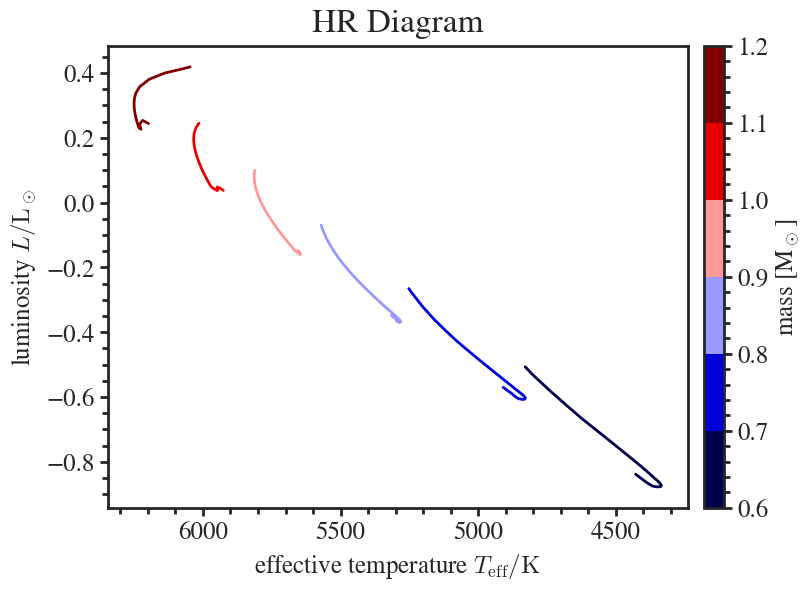

In [9]:
fig = plt.figure(figsize=(8,6))

norm = mpl.colors.Normalize(vmin=0.7, vmax=1.2)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.seismic)

for mass in ("0.7", "0.8", "0.9", "1.0", "1.1", "1.2"):
    logs_dir_ = os.path.join("grid", mass)
    DF_    = load_history_file          (logs_dir_)
    #index_ = get_index                  (logs_dir_)
    #profs_ = get_profiles       (index_, logs_dir_)
    
    #plt.plot(10**DF_.log_Teff, DF_.log_L)
    plt.plot(10**DF_.log_Teff, DF_.log_L, c=cmap.to_rgba(float(mass)))

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')

plt.title('HR Diagram', size=24)

plt.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.11, 0.025, 0.77])
cbar = plt.colorbar(cmap, cax=cbar_ax, boundaries=[0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25])
cbar.ax.set_yticklabels([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
cbar.ax.set_ylabel(r'mass [M$_\odot$]');

#plt.tight_layout()

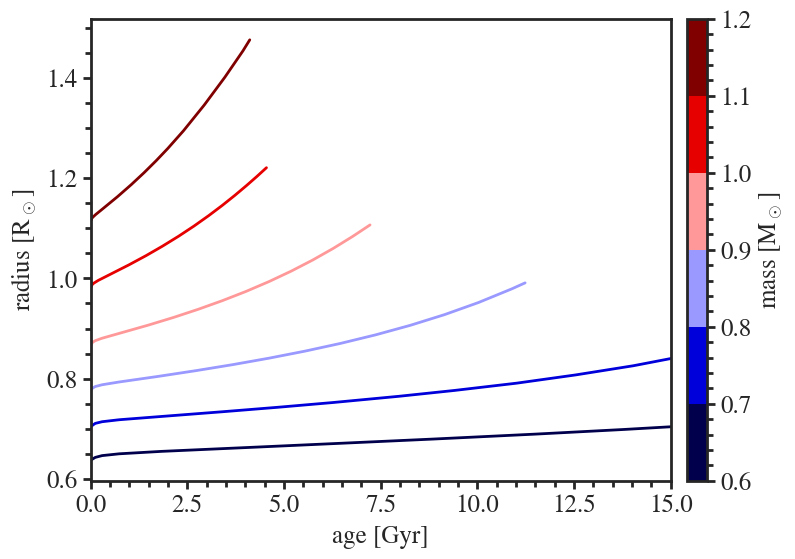

In [10]:
def add_cbar(fig):
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.87, 0.11, 0.025, 0.77])
    cbar = plt.colorbar(cmap, cax=cbar_ax, boundaries=[0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25])
    cbar.ax.set_yticklabels([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
    cbar.ax.set_ylabel(r'mass [M$_\odot$]')

def plot_MRA():
    fig = plt.figure(figsize=(8,6))

    norm = mpl.colors.Normalize(vmin=0.7, vmax=1.2)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.seismic)

    for mass in ("0.7", "0.8", "0.9", "1.0", "1.1", "1.2"):
        logs_dir_ = os.path.join("grid", mass)
        DF_    = load_history_file   (logs_dir_)
        plt.plot(DF_.star_age/1e9, 10**DF_.log_R, c=cmap.to_rgba(float(mass)))

    plt.xlim([0, 15])
    plt.xlabel(r'age [Gyr]')
    plt.ylabel(r'radius [R$_\odot$]')
    return fig, cmap

fig, cmap = plot_MRA()
add_cbar(fig)

In [11]:
star1_radius = ufloat(1,     1*0.01) #  1% uncertainty 
star1_mass   = ufloat(1,     1*0.04) #  4% uncertainty 
star1_age    = ufloat(4.5, 4.5*0.1)  # 10% uncertainty 

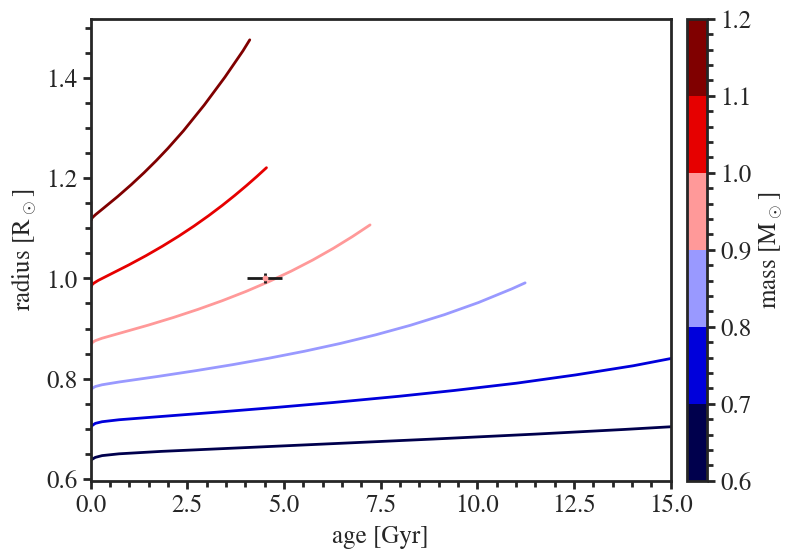

In [12]:
fig, cmap = plot_MRA()
plt.errorbar(star1_age.n, star1_radius.n, xerr=star1_age.s, yerr=star1_radius.s, color='k')
plt.scatter(star1_age.n, star1_radius.n, color=cmap.to_rgba(star1_mass.n), s=10, zorder=100)
add_cbar(fig)

In [13]:
comb_DF = None
for mass in ("0.7", "0.8", "0.9", "1.0", "1.1", "1.2"):
    logs_dir_ = os.path.join("grid", mass)
    DF_ = load_history_file(logs_dir_)
    
    DF_['radius'] = 10**DF_.log_R
    DF_['age']    = DF_.star_age/1e9
    DF_['mass']   = DF_.star_mass
    
    new_DF = DF_[['age', 'mass', 'radius']]
    
    ### interpolate 
    #ages = np.linspace(new_DF['age'].min(), new_DF['age'].max(), 1000)
    #radii = sp.interpolate.interp1d(new_DF['age'], new_DF['radius'])(ages)
    #new_DF = pd.DataFrame({'age': ages, 'mass': float(mass), 'radius': radii})
    
    if comb_DF is None:
        comb_DF = new_DF
    else:
        comb_DF = comb_DF.append(new_DF, ignore_index=True)

comb_DF

,age,mass,radius
0,0.000744,0.7,0.646969
1,0.002596,0.7,0.643482
2,0.007204,0.7,0.639720
3,0.018669,0.7,0.637914
4,0.047198,0.7,0.639460
...,...,...,...
112,2.398301,1.2,1.294532
113,2.936596,1.2,1.346026
114,3.469524,1.2,1.401508
115,3.937474,1.2,1.454129


In [14]:
def plot_MRA_consistency(radius=1, frac_radius_unc=0.01, 
                         mass=1,   frac_mass_unc=0.04, 
                         age=4.57, frac_age_unc=0.1):
    
    fig, cmap = plot_MRA()
    
    star1_radius = ufloat(radius, frac_radius_unc*radius)
    star1_mass   = ufloat(mass,   frac_mass_unc*mass)
    star1_age    = ufloat(age,    frac_age_unc*age)
    
    plt.errorbar(star1_age.n, star1_radius.n, xerr=star1_age.s, yerr=star1_radius.s, color='k')
    plt.scatter(star1_age.n, star1_radius.n, color=cmap.to_rgba(star1_mass.n), s=10, zorder=100)
    
    chi2 = ((comb_DF['age']-star1_age.n)/star1_age.s)**2 + \
           ((comb_DF['mass']-star1_mass.n)/star1_mass.s)**2 + \
           ((comb_DF['radius']-star1_radius.n)/star1_radius.s)**2
    age, mass, radius = comb_DF.loc[chi2.argmin()]
    chi2min = chi2.min()
    plt.text(star1_age.n*1.02, star1_radius.n*1.02, r'$\chi^2 = %.2f$' % chi2min,
             color='k' if stats.chi2.pdf(chi2min, 2)>0.01 else 'red')
            #color='k' if chi2min < 5.9 else 'red')
    plt.plot([age, star1_age.n], [radius, star1_radius.n], c='lightgray', lw=3, zorder=-99)
    
    add_cbar(fig)

interact(plot_MRA_consistency, 
         radius=         FloatSlider(value=1,    min=0.65,  max=1.4, step=0.01),
         frac_radius_unc=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001),
         mass=           FloatSlider(value=1,    min=0.7,   max=1.2, step=0.1),
         frac_mass_unc=  FloatSlider(value=0.04, min=0.01,  max=0.1, step=0.01),
         age=            FloatSlider(value=4.57, min=0.1,   max=15,  step=0.1),
         frac_age_unc=   FloatSlider(value=0.10, min=0.01,  max=0.5, step=0.1), continuous_update=False);

interactive(children=(FloatSlider(value=1.0, description='radius', max=1.4, min=0.65, step=0.01), FloatSlider(…

In [15]:
range_radius = comb_DF.radius.min(), comb_DF.radius.max()
range_mass   = comb_DF.mass.min(),   comb_DF.mass.max()
range_age    = comb_DF.age.min(),    comb_DF.age.max()
range_age

(0.00020859555092982905, 28.45765814091767)

In [16]:
nsamples = 10000
radius_ = np.random.uniform(*range_radius, nsamples)
mass_   = np.random.uniform(*range_mass,   nsamples)
age_    = np.random.uniform(*range_age,    nsamples)
chi2_   = []

frac_radius_unc = 0.01
frac_mass_unc = 0.04

for (radius, mass, age) in zip(radius_, mass_, age_):
        age_unc = 0.3+age/20 
        chi2 = ((comb_DF['age']-age)/age_unc)**2 + \
               ((comb_DF['mass']-mass)/(frac_mass_unc*mass))**2 + \
               ((comb_DF['radius']-radius)/(frac_radius_unc*radius))**2
        chi2_ += [chi2.min()]
chi2_ = np.array(chi2_)

In [17]:
def plot_MRA_observations(sigma=5.9, clip=True):
    
    fig, cmap = plot_MRA()
    
    if clip:
        idx = chi2_<sigma
    else:
        idx = range(len(age_))
    plt.errorbar(age_[idx], radius_[idx], 
                 xerr=0.3+age_[idx]/20, 
                 yerr=frac_radius_unc*radius_[idx], 
                 color='darkgray', zorder=-99, ls='none')
    plt.scatter (age_[idx], radius_[idx], color=cmap.to_rgba(mass_[idx]), s=10, zorder=100)
    
    add_cbar(fig)

interact(plot_MRA_observations, 
         sigma=FloatSlider(value=5.9, min=0, max=50, step=1), continuous_update=False);

interactive(children=(FloatSlider(value=5.9, description='sigma', max=50.0, step=1.0), Checkbox(value=True, de…